<a href="https://colab.research.google.com/github/shivam-kumar88/detection-of-ckd-using-ML/blob/main/CKDproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
from google.colab import files
upload = files.upload()

Saving chronic_kidney_disease_full.arff to chronic_kidney_disease_full.arff


In [44]:
data = []
with open('chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data[145:], columns=names)

In [45]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd,None
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd,None
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd,None
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd,None
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,26,0.6,137,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd,None
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,50,1.0,135,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd,None
399,58,80,1.025,0,0,normal,normal,notpresent,notpresent,131,18,1.1,141,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd,None
400,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [46]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd,None
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd,None
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd,None
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd,None
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd,None
5,60,90,1.015,3,0,?,?,notpresent,notpresent,74,25,1.1,142,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd,None
6,68,70,1.010,0,0,?,normal,notpresent,notpresent,100,54,24.0,104,4.0,12.4,36,?,?,no,no,no,good,no,no,ckd,None
7,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,410,31,1.1,?,?,12.4,44,6900,5,no,yes,no,good,yes,no,ckd,None
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,60,1.9,?,?,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd,None
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd,None


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      402 non-null    object
 1   bp       400 non-null    object
 2   sg       400 non-null    object
 3   al       400 non-null    object
 4   su       400 non-null    object
 5   rbc      400 non-null    object
 6   pc       400 non-null    object
 7   pcc      400 non-null    object
 8   ba       400 non-null    object
 9   bgr      400 non-null    object
 10  bu       400 non-null    object
 11  sc       400 non-null    object
 12  sod      400 non-null    object
 13  pot      400 non-null    object
 14  hemo     400 non-null    object
 15  pcv      400 non-null    object
 16  wbcc     400 non-null    object
 17  rbcc     400 non-null    object
 18  htn      400 non-null    object
 19  dm       400 non-null    object
 20  cad      400 non-null    object
 21  appet    400 non-null    object
 22  pe

In [48]:
df.isnull()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
398,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
399,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
400,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [52]:
df.isnull().sum()

age          0
bp           2
sg           2
al           2
su           2
rbc          2
pc           2
pcc          2
ba           2
bgr          2
bu           2
sc           2
sod          2
pot          2
hemo         2
pcv          2
wbcc         2
rbcc         2
htn          2
dm           2
cad          2
appet        2
pe           2
ane          2
class        2
no_name    399
dtype: int64

In [205]:
ckddata = df[['age', 'bp', 'sg', 'al', 'su',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc',
         'class']].copy()
         #made a subdataset of main data

In [206]:

ckddata.drop([400, 401], inplace=True, axis=0)
#ckddata.drop('no_name', inplace=True, axis=1)
#removed the row 400 and 401 from the dataframe and removed no_name column
#tempdata2 = ['rbc', 'pc', 'pcc', 'ba','no_name',
            #'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
#for i in tempdata2:
  #ckddata.drop(tempdata2[i], inplace=True, axis=1)


In [207]:
ckddata

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48,80,1.020,1,0,121,36,1.2,?,?,15.4,44,7800,5.2,ckd
1,7,50,1.020,4,0,?,18,0.8,?,?,11.3,38,6000,?,ckd
2,62,80,1.010,2,3,423,53,1.8,?,?,9.6,31,7500,?,ckd
3,48,70,1.005,4,0,117,56,3.8,111,2.5,11.2,32,6700,3.9,ckd
4,51,80,1.010,2,0,106,26,1.4,?,?,11.6,35,7300,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,140,49,0.5,150,4.9,15.7,47,6700,4.9,notckd
396,42,70,1.025,0,0,75,31,1.2,141,3.5,16.5,54,7800,6.2,notckd
397,12,80,1.020,0,0,100,26,0.6,137,4.4,15.8,49,6600,5.4,notckd
398,17,60,1.025,0,0,114,50,1.0,135,4.9,14.2,51,7200,5.9,notckd


In [209]:
#replaced ? with NaN and given values with 1 and 0 respectfully
ckddata.replace(to_replace=["ckd", "notckd","normal", "abnormal",
                       "present", "notpresent", "yes", "no",
                       "good", "poor", "?"],
                 value=["1","0","1","0","1","0","1","0","1","0",np.nan],
                inplace= True)

In [210]:
ckddata

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48,80,1.020,1,0,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,1
1,7,50,1.020,4,0,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,1
2,62,80,1.010,2,3,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,1
3,48,70,1.005,4,0,117,56,3.8,111,2.5,11.2,32,6700,3.9,1
4,51,80,1.010,2,0,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,140,49,0.5,150,4.9,15.7,47,6700,4.9,0
396,42,70,1.025,0,0,75,31,1.2,141,3.5,16.5,54,7800,6.2,0
397,12,80,1.020,0,0,100,26,0.6,137,4.4,15.8,49,6600,5.4,0
398,17,60,1.025,0,0,114,50,1.0,135,4.9,14.2,51,7200,5.9,0


In [211]:
ckddata.isnull().sum()
#no of missing data in column

age        9
bp        12
sg        47
al        46
su        49
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wbcc     105
rbcc     130
class      0
dtype: int64

In [212]:
ckddata.isnull().sum()/len(ckddata)*100
#percentage of missing data 

age       2.25
bp        3.00
sg       11.75
al       11.50
su       12.25
bgr      11.00
bu        4.75
sc        4.25
sod      21.75
pot      22.00
hemo     13.00
pcv      17.50
wbcc     26.25
rbcc     32.50
class     0.00
dtype: float64

In [213]:
ckddata

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48,80,1.020,1,0,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,1
1,7,50,1.020,4,0,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,1
2,62,80,1.010,2,3,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,1
3,48,70,1.005,4,0,117,56,3.8,111,2.5,11.2,32,6700,3.9,1
4,51,80,1.010,2,0,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,140,49,0.5,150,4.9,15.7,47,6700,4.9,0
396,42,70,1.025,0,0,75,31,1.2,141,3.5,16.5,54,7800,6.2,0
397,12,80,1.020,0,0,100,26,0.6,137,4.4,15.8,49,6600,5.4,0
398,17,60,1.025,0,0,114,50,1.0,135,4.9,14.2,51,7200,5.9,0


In [214]:
col = ['age', 'bp', 'sg', 'al', 'su',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc',]
for i in col:
  ckddata[i] = pd.to_numeric(df[i],
                              errors = 'coerce')
#age_mean = ckddata['age'].mean()

In [215]:
print(ckddata.dtypes)

age      float64
bp       float64
sg       float64
al       float64
su       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
class     object
dtype: object


In [216]:
ckddata.head(10)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,1
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,4.4,1
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,24.0,104.0,4.0,12.4,36.0,NaN,NaN,1
7,24.0,NaN,1.015,2.0,4.0,410.0,31.0,1.1,NaN,NaN,12.4,44.0,6900.0,5.0,1
8,52.0,100.0,1.015,3.0,0.0,138.0,60.0,1.9,NaN,NaN,10.8,33.0,9600.0,4.0,1
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,1


In [220]:
#age_mean = ckddata['age'].mean()
#age_mean
tempdata1 = ['age', 'bp', 'sg', 'al', 'su',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc']
for i in col:
  name = i+"_mean"
  print(name)
  name = ckddata[i].mean()
  print(i+"->")
  print(name)
  #print("\n")

age_mean
age->
51.48337595907928
bp_mean
bp->
76.46907216494846
sg_mean
sg->
1.0174079320113256
al_mean
al->
1.0169491525423728
su_mean
su->
0.45014245014245013
bgr_mean
bgr->
148.0365168539326
bu_mean
bu->
57.425721784776904
sc_mean
sc->
3.0724543080939934
sod_mean
sod->
137.52875399361022
pot_mean
pot->
4.627243589743592
hemo_mean
hemo->
12.526436781609195
pcv_mean
pcv->
38.88449848024316
wbcc_mean
wbcc->
8406.122448979591
rbcc_mean
rbcc->
4.707434944237919


In [226]:
#replaincg the missing value with mean value of rest of the data
ckddata['age'].fillna(51.48337595907928, inplace=True)
ckddata['bp'].fillna(76.46907216494846, inplace=True)
ckddata['sg'].fillna(1.0174079320113256, inplace=True)
ckddata['al'].fillna(1.0169491525423728, inplace=True)
ckddata['su'].fillna(0.45014245014245013, inplace=True)
ckddata['bgr'].fillna(148.0365168539326, inplace=True)
ckddata['bu'].fillna(57.425721784776904, inplace=True)
ckddata['sc'].fillna(3.0724543080939934, inplace=True)
ckddata['sod'].fillna(137.52875399361022, inplace=True)
ckddata['pot'].fillna(4.627243589743592, inplace=True)
ckddata['hemo'].fillna(12.526436781609195, inplace=True)
ckddata['pcv'].fillna(38.88449848024316, inplace=True)
ckddata['wbcc'].fillna(8406.122448979591, inplace=True)
ckddata['rbcc'].fillna(4.707434944237919, inplace=True)


In [228]:
ckddata.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
class    0
dtype: int64

In [227]:
ckddata

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,1
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,1
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,0


In [235]:
feature_data = ['age', 'bp', 'sg', 'al', 'su',
                'bgr', 'bu', 'sc','sod', 'pot',
                'hemo', 'pcv', 'wbcc', 'rbcc']
target_data = ['class']
X = ckddata[feature_data]
y = ckddata[target_data]

In [236]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)
# 70% training and 30% test

In [239]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [240]:
#Evaluating Model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [241]:
#now to visualize decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


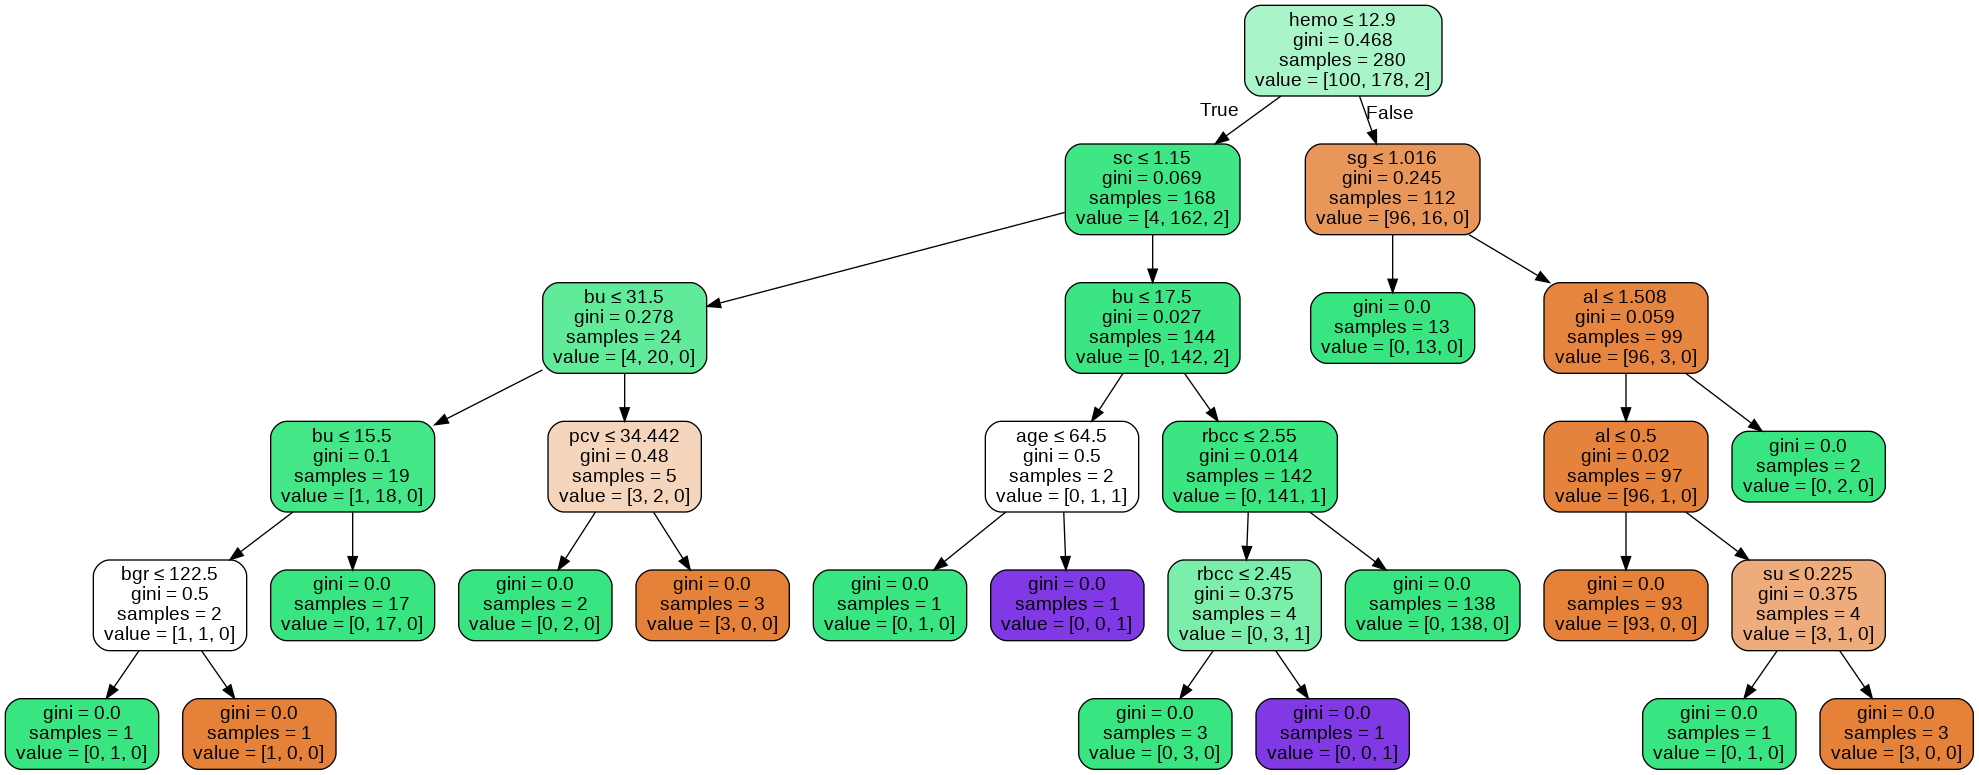

In [246]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ckd.png')
Image(graph.create_png())

In [ ]:




#implementing support-vector machines (SVM)




In [249]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline

In [248]:
ckddata.shape

(400, 15)

In [250]:
# i have used fit method of SVJ to train the algorithm on the training data
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [251]:
#making predection
y_pred = svclassifier.predict(X_test)

In [252]:
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix

In [253]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[49  1  0]
 [ 3 66  1]
 [ 0  0  0]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.99      0.94      0.96        70
        ckd	       0.00      0.00      0.00         0

    accuracy                           0.96       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.97      0.96      0.96       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [254]:
import matplotlib.pyplot as plt